In [90]:
#IMPORTING MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [91]:
#LOADING DATASET
df=pd.read_csv('Vaccination.csv')

In [92]:
df.head()

,area,areaid,dailydose1,dailydose2,dailydose3,daydiff,daytotal,referencedate,totaldistinctpersons,totaldose1,totaldose2,totaldose3,totalvaccinations
0,ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ,701,1297,834,0,97,2036,2021-05-06 00:00:00,34083,34083,11278,0,45170
1,ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,901,1215,1298,0,-22,2459,2021-05-06 00:00:00,63212,63212,24230,0,87338
2,ΑΝΔΡΟΥ,1201,118,77,0,-53,195,2021-05-06 00:00:00,2628,2628,1198,0,3826
3,ΑΡΓΟΛΙΔΑΣ,1001,532,652,0,-35,1089,2021-05-06 00:00:00,20864,20864,9034,0,29708
4,ΑΡΚΑΔΙΑΣ,1002,567,359,0,9,877,2021-05-06 00:00:00,17403,17403,6940,0,24244


In [93]:
#Check how many NaNs for each column
df.isnull().sum()

area                    0
areaid                  0
dailydose1              0
dailydose2              0
dailydose3              0
daydiff                 0
daytotal                0
referencedate           0
totaldistinctpersons    0
totaldose1              0
totaldose2              0
totaldose3              0
totalvaccinations       0
dtype: int64

In [94]:
#Fill NaNs with 0 and then drop all areas with areaid = 0. 
df.fillna(0, inplace = True)
df.drop(df.index[df['areaid'] == 0], inplace = True)

In [95]:
#Check how many nulls we have. SHould be none. 
df.isnull().sum()

area                    0
areaid                  0
dailydose1              0
dailydose2              0
dailydose3              0
daydiff                 0
daytotal                0
referencedate           0
totaldistinctpersons    0
totaldose1              0
totaldose2              0
totaldose3              0
totalvaccinations       0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26788 entries, 0 to 26787
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   area                  26788 non-null  object
 1   areaid                26788 non-null  int64 
 2   dailydose1            26788 non-null  int64 
 3   dailydose2            26788 non-null  int64 
 4   dailydose3            26788 non-null  int64 
 5   daydiff               26788 non-null  int64 
 6   daytotal              26788 non-null  int64 
 7   referencedate         26788 non-null  object
 8   totaldistinctpersons  26788 non-null  int64 
 9   totaldose1            26788 non-null  int64 
 10  totaldose2            26788 non-null  int64 
 11  totaldose3            26788 non-null  int64 
 12  totalvaccinations     26788 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 2.9+ MB


In [97]:
df['referencedate'] =  pd.to_datetime(df['referencedate'], format='%Y-%m-%d')

In [98]:
#Print column names and drop the ones we don't intend to use. 
df.columns

Index(['area', 'areaid', 'dailydose1', 'dailydose2', 'dailydose3', 'daydiff',
       'daytotal', 'referencedate', 'totaldistinctpersons', 'totaldose1',
       'totaldose2', 'totaldose3', 'totalvaccinations'],
      dtype='object')

In [100]:
#We select to examine Thessaloniki
df_thess = df[df["area"] == 'ΘΕΣΣΑΛΟΝΙΚΗΣ'].copy()
df_thess

,area,areaid,dailydose1,dailydose2,dailydose3,daydiff,daytotal,referencedate,totaldistinctpersons,totaldose1,totaldose2,totaldose3,totalvaccinations
22,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,5747,7107,0,159,12504,2021-05-06,273732,273735,125770,0,398806
96,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,5311,7157,0,-378,12126,2021-05-07,279043,279046,132927,0,410932
170,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,5249,7289,0,-310,12193,2021-05-10,289992,289995,147357,0,435628
244,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,5470,7005,0,-51,12142,2021-05-11,295462,295465,154362,0,447770
318,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,5138,6905,0,-378,11764,2021-05-12,300600,300603,161267,0,459534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26440,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,1249,777,1626,-10,3555,2021-10-23,646463,646472,618467,31028,1268999
26514,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,31,8,9,-3507,48,2021-10-24,646494,646503,618475,31037,1269047
26588,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,1193,546,1953,3559,3607,2021-10-25,647687,647696,619021,32990,1272654
26662,ΘΕΣΣΑΛΟΝΙΚΗΣ,202,59,13,18,-3518,89,2021-10-26,647746,647755,619034,33008,1272743


In [15]:
df_thess.drop(df_thess.index[df_thess['totalvaccinations'] == 0], inplace = True)

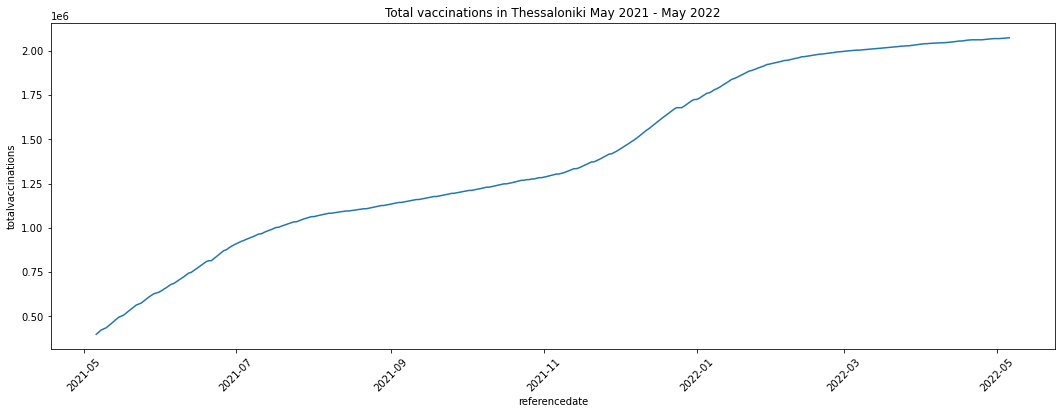

In [103]:
#Plot total vaccinations as a function of reference date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_thess, x="referencedate", y="totalvaccinations")
plt.title("Total vaccinations in Thessaloniki May 2021 - May 2022")
plt.xticks(rotation=45)
plt.show()

In [18]:
df_thess.drop(df_thess.index[df_thess['dailydose1'] == 0], inplace = True)

Text(0.5, 1.0, 'Daily vaccinations of the first vaccine dose in Thessaloniky')

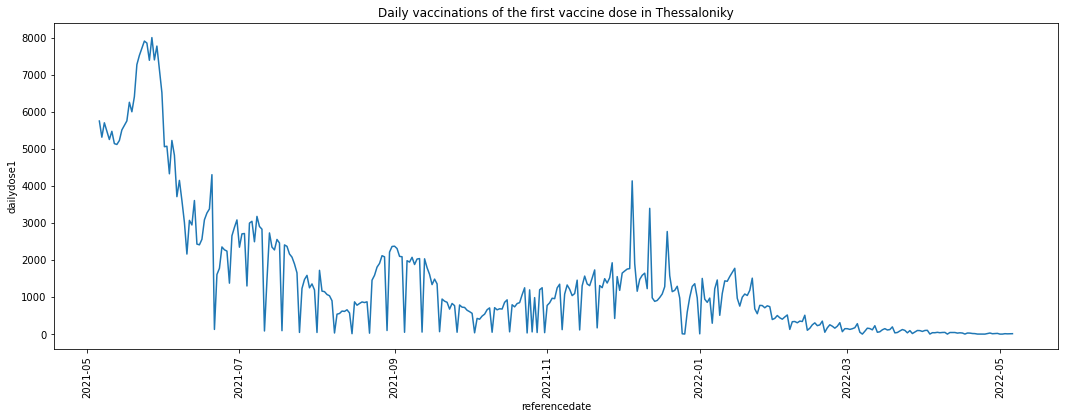

In [104]:
#Plot daily dose of the first vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_thess, x="referencedate", y="dailydose1")
plt.xticks(rotation=90)
plt.title("Daily vaccinations of the first vaccine dose in Thessaloniky")

Text(0.5, 1.0, 'Daily vaccinations of the second vaccine dose in Thessaloniky')

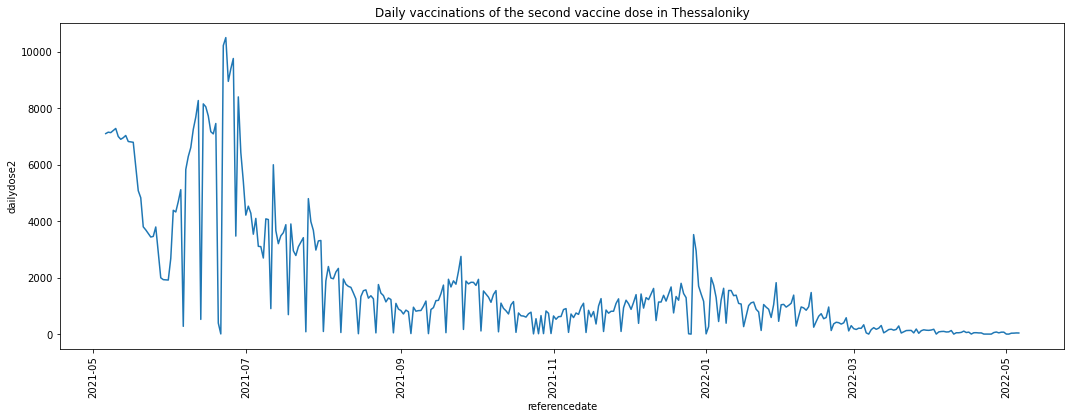

In [105]:
#Plot daily dose of the second vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_thess, x="referencedate", y="dailydose2")
plt.xticks(rotation=90)
plt.title("Daily vaccinations of the second vaccine dose in Thessaloniky")

Text(0.5, 1.0, 'Daily vaccinations of the third vaccine dose in Thessaloniky')

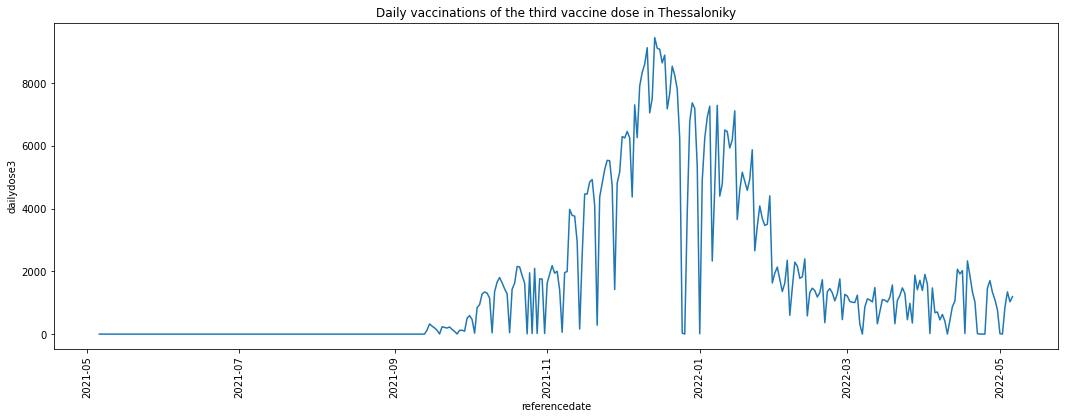

In [106]:
#Plot daily dose of the third vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_thess, x="referencedate", y="dailydose3")
plt.xticks(rotation=90)
plt.title("Daily vaccinations of the third vaccine dose in Thessaloniky")

In [102]:
#We select to examine Athens
df_ath = df[df["area"] == 'ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ'].copy()
df_ath

,area,areaid,dailydose1,dailydose2,dailydose3,daydiff,daytotal,referencedate,totaldistinctpersons,totaldose1,totaldose2,totaldose3,totalvaccinations
33,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,3986,7112,0,207,10539,2021-05-06,290680,290682,151352,0,440941
107,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,3851,7020,0,-243,10296,2021-05-07,294531,294533,158372,0,451237
181,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,3635,7149,0,-330,10138,2021-05-10,302147,302149,172649,0,471843
255,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,3683,6965,0,-122,10016,2021-05-11,305830,305832,179614,0,481859
329,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,3671,6896,0,-94,9922,2021-05-12,309501,309503,186510,0,491781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26451,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,1046,796,1547,-39,3275,2021-10-23,706980,706991,675243,41530,1370278
26525,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,30,24,2,-3224,51,2021-10-24,707010,707021,675267,41532,1370329
26599,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,758,548,1522,2676,2727,2021-10-25,707768,707779,675815,43054,1373056
26673,ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,822,548,1447,-43,2684,2021-10-26,708590,708601,676363,44501,1375740


In [26]:
df_ath.drop(df_ath.index[df_ath['totalvaccinations'] == 0], inplace = True)

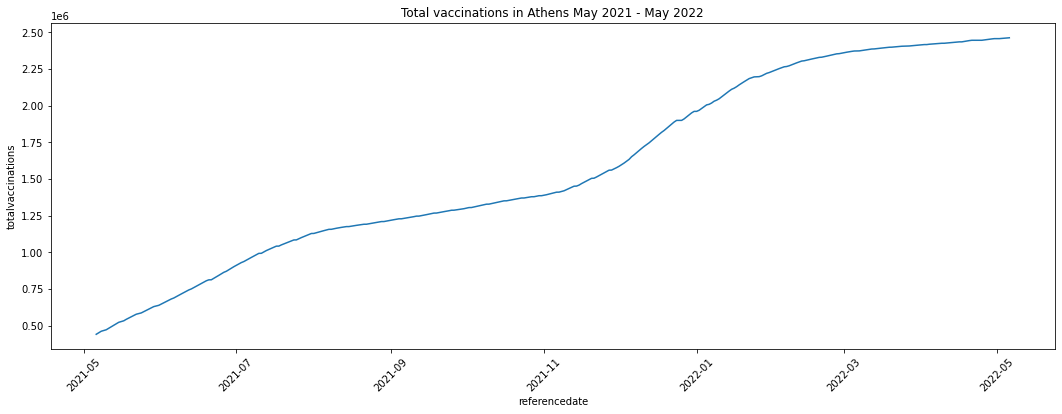

In [110]:
#Plot total vaccinations as a function of reference date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_ath, x="referencedate", y="totalvaccinations")
plt.title("Total vaccinations in Athens May 2021 - May 2022")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Daily vaccinations for the first vaccine dose in Athens')

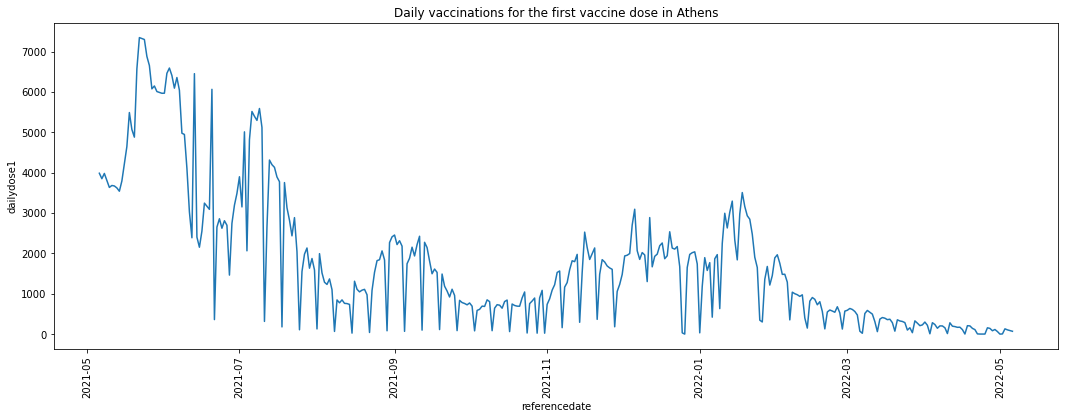

In [111]:
#Plot daily dose of the first vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_ath, x="referencedate", y="dailydose1")
plt.xticks(rotation=90)
plt.title("Daily vaccinations for the first vaccine dose in Athens")

Text(0.5, 1.0, 'Daily vaccinations for second vaccine dose in Athens')

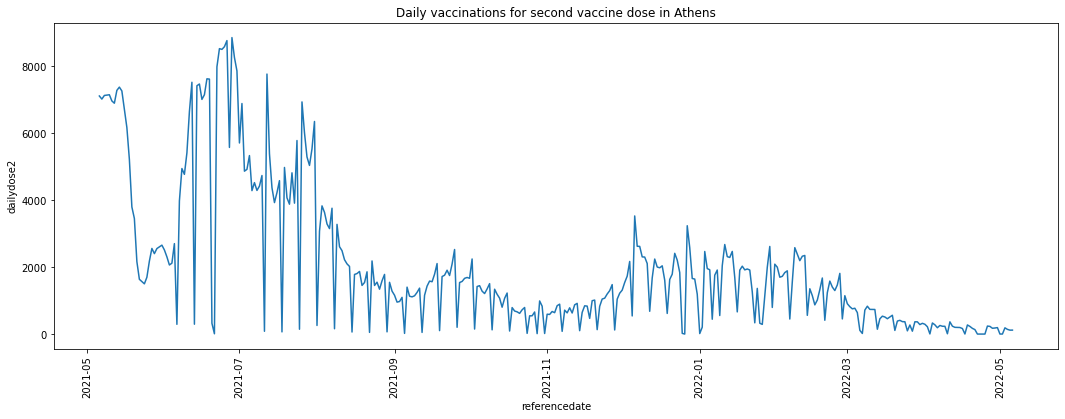

In [112]:
#Plot daily dose of the second vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_ath, x="referencedate", y="dailydose2")
plt.xticks(rotation=90)
plt.title("Daily vaccinations for second vaccine dose in Athens")

Text(0.5, 1.0, 'Daily vaccinations for third vaccine dose in Athens')

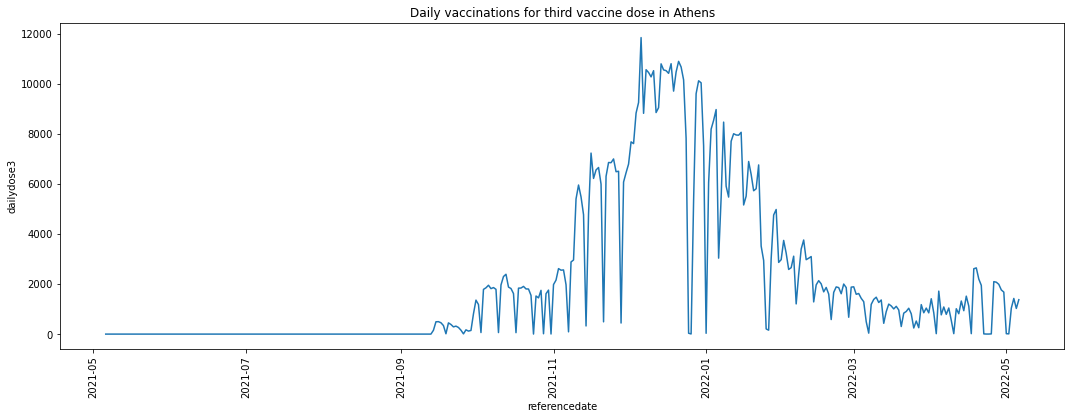

In [113]:
#Plot daily dose of the third vaccine as a function of date
plt.figure(figsize=(18,6))
sns.lineplot(data=df_ath, x="referencedate", y="dailydose3")
plt.xticks(rotation=90)
plt.title("Daily vaccinations for third vaccine dose in Athens")

In [114]:
#Printing the top 10 areas in Greece with vaccination analysis
vacc_by_area = df.groupby('area').max().sort_values('totalvaccinations', ascending=False)
vacc_by_area = vacc_by_area.iloc[:10]
vacc_by_area

,areaid,dailydose1,dailydose2,dailydose3,daydiff,daytotal,referencedate,totaldistinctpersons,totaldose1,totaldose2,totaldose3,totalvaccinations
area,,,,,,,,,,,,
ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,7345,8856,11843,10045,18078,2022-05-06,910147,910224,867653,756762,2462731
ΘΕΣΣΑΛΟΝΙΚΗΣ,202,7998,10510,9458,11296,12504,2022-05-06,771501,771510,738889,599373,2074300
ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,902,8149,7599,9196,9219,10916,2022-05-06,727157,727167,709124,593817,1994434
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,904,6670,6329,5533,6665,8207,2022-05-06,487072,487075,462098,333231,1268876
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,907,5408,5601,3309,6583,7685,2022-05-06,367049,367054,341372,216797,916846
ΠΕΙΡΑΙΩΣ,908,1731,2031,2196,2285,2746,2022-05-06,229180,229180,218463,192490,624669
ΗΡΑΚΛΕΙΟΥ,1301,2071,2515,2810,3046,3666,2022-05-06,220276,220279,215566,173325,597040
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,901,1541,2094,3245,2630,3865,2022-05-06,198036,198040,192656,203507,585894
ΑΧΑΪΑΣ,702,2242,2583,2484,3049,3455,2022-05-06,224163,224163,213779,156901,580875


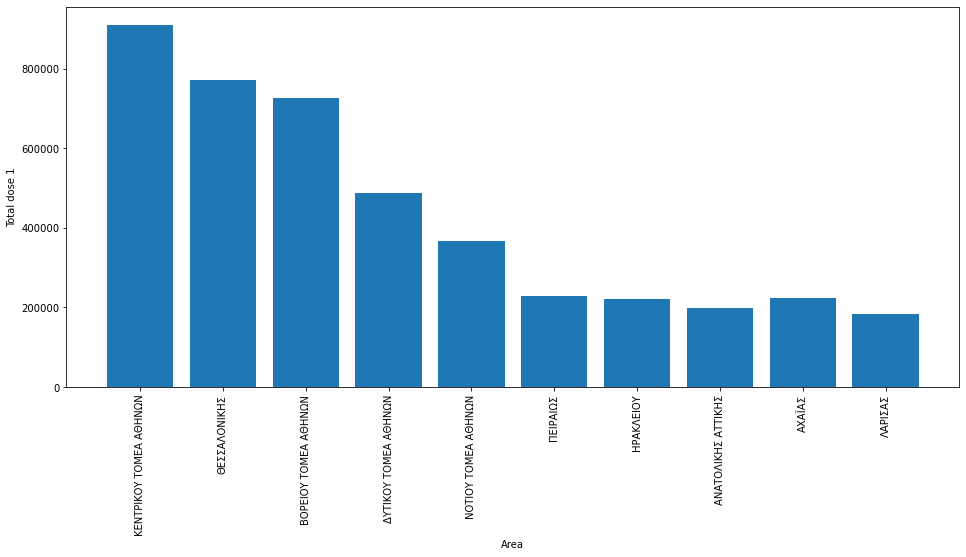

In [115]:
#The plot  of the first dose as a function of the area
plt.figure(figsize=(16, 7))
plt.bar(vacc_by_area.index, vacc_by_area.totaldose1)
plt.xticks(rotation = 90)
plt.ylabel('Total dose 1')
plt.xlabel('Area')
plt.show()

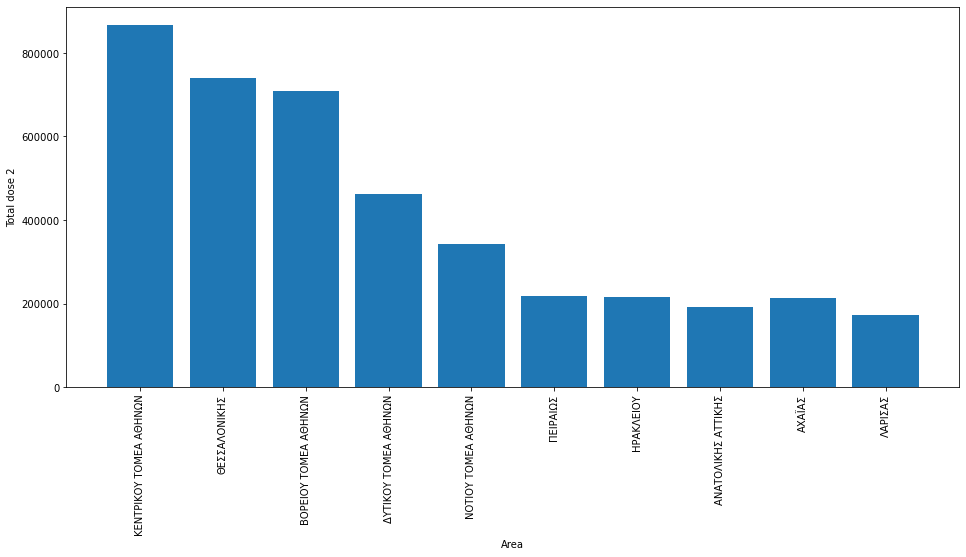

In [116]:
#The plot  of the second dose as a function of the area
plt.figure(figsize=(16, 7))
plt.bar(vacc_by_area.index, vacc_by_area.totaldose2)
plt.xticks(rotation = 90)
plt.ylabel('Total dose 2')
plt.xlabel('Area')
plt.show()

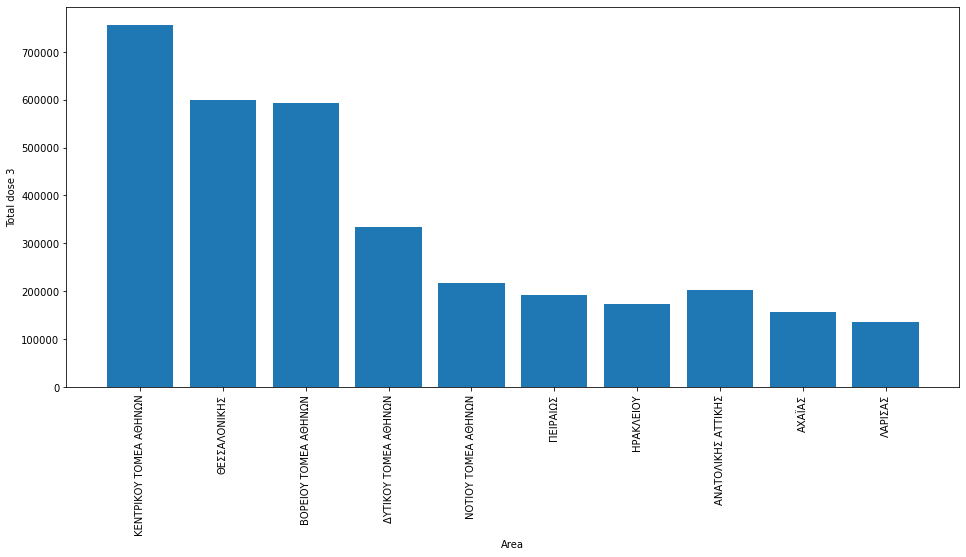

In [117]:
#The plot  of the third dose as a function of the area
plt.figure(figsize=(16, 7))
plt.bar(vacc_by_area.index, vacc_by_area.totaldose3)
plt.xticks(rotation = 90)
plt.ylabel('Total dose 3')
plt.xlabel('Area')
plt.show()

In [39]:
total_vacc_by_area = df.groupby('area').max().sort_values('totalvaccinations', ascending=False)
total_vacc_by_area = total_vacc_by_area.iloc[:10]
total_vacc_by_area

,areaid,dailydose1,dailydose2,dailydose3,daydiff,daytotal,referencedate,totaldistinctpersons,totaldose1,totaldose2,totaldose3,totalvaccinations
area,,,,,,,,,,,,
ΚΕΝΤΡΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,905,7345,8856,11843,10045,18078,2022-05-06,910147,910224,867653,756762,2462731
ΘΕΣΣΑΛΟΝΙΚΗΣ,202,7998,10510,9458,11296,12504,2022-05-06,771501,771510,738889,599373,2074300
ΒΟΡΕΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,902,8149,7599,9196,9219,10916,2022-05-06,727157,727167,709124,593817,1994434
ΔΥΤΙΚΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,904,6670,6329,5533,6665,8207,2022-05-06,487072,487075,462098,333231,1268876
ΝΟΤΙΟΥ ΤΟΜΕΑ ΑΘΗΝΩΝ,907,5408,5601,3309,6583,7685,2022-05-06,367049,367054,341372,216797,916846
ΠΕΙΡΑΙΩΣ,908,1731,2031,2196,2285,2746,2022-05-06,229180,229180,218463,192490,624669
ΗΡΑΚΛΕΙΟΥ,1301,2071,2515,2810,3046,3666,2022-05-06,220276,220279,215566,173325,597040
ΑΝΑΤΟΛΙΚΗΣ ΑΤΤΙΚΗΣ,901,1541,2094,3245,2630,3865,2022-05-06,198036,198040,192656,203507,585894
ΑΧΑΪΑΣ,702,2242,2583,2484,3049,3455,2022-05-06,224163,224163,213779,156901,580875


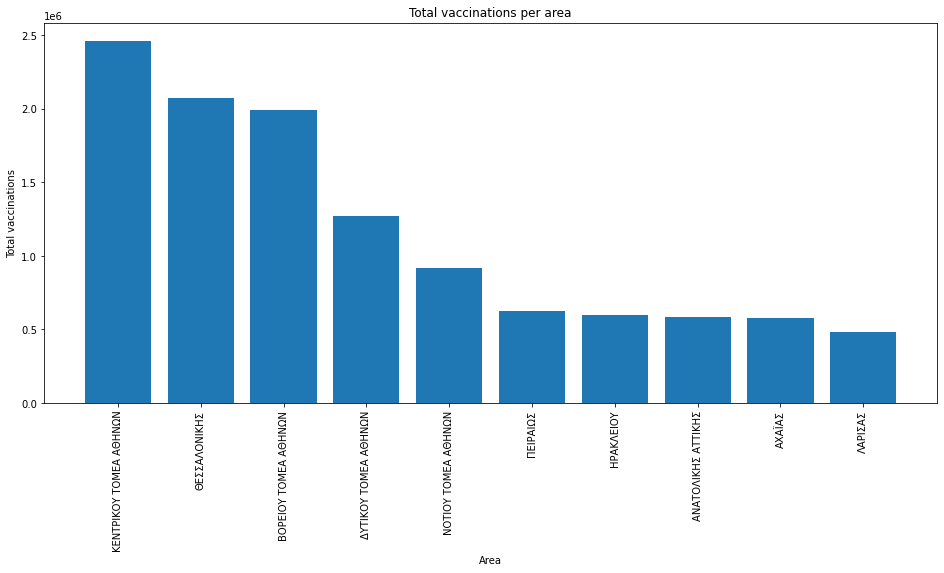

In [118]:
#The plot of total vaccinations as a function of the area
plt.figure(figsize=(16, 7))
plt.bar(total_vacc_by_area.index, total_vacc_by_area.totalvaccinations)
plt.title('Total vaccinations per area')
plt.xticks(rotation = 90)
plt.ylabel('Total vaccinations')
plt.xlabel('Area')
plt.show()